<a href="https://colab.research.google.com/github/tarangga/Coursera/blob/main/Coursera_Principal_Component_Analysis_with_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris.dropna(how='all', inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

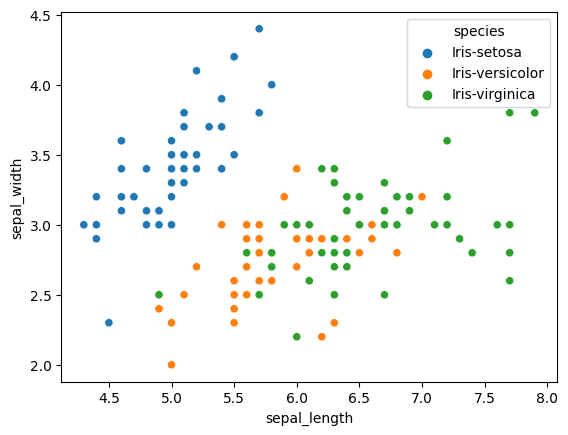

In [16]:
sns.scatterplot(iris, x='sepal_length', y='sepal_width', hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

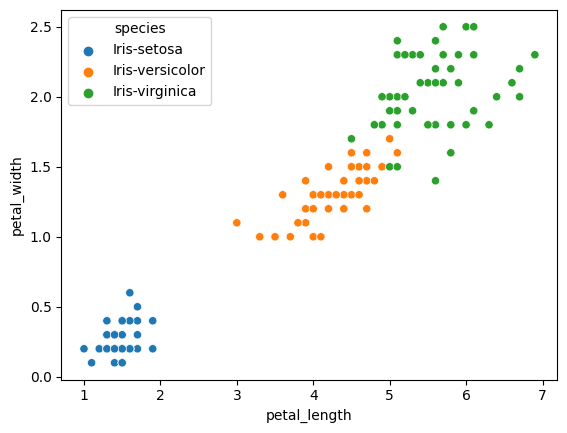

In [18]:
sns.scatterplot(iris, x='petal_length', y='petal_width', hue='species')


In [23]:
X = iris.drop(columns='species').values
y = iris['species']

In [25]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [29]:
cov_matrix = np.cov(X.T)
cov_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [31]:
eigen_values, eigen_vector = np.linalg.eig(cov_matrix)
eigen_values, eigen_vector

(array([2.93035378, 0.92740362, 0.14834223, 0.02074601]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

In [33]:
eigen_vec_svd, s, v = np.linalg.svd(X.T)
eigen_vec_svd, s, v

(array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
        [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
        [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
        [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]]),
 array([20.89551896, 11.75513248,  4.7013819 ,  1.75816839]),
 array([[ 1.08374515e-01,  9.98503796e-02,  1.13323362e-01, ...,
         -7.27833114e-02, -6.58701606e-02, -4.59092965e-02],
        [-4.30198387e-02,  5.57547718e-02,  2.70926177e-02, ...,
         -2.26960075e-02, -8.64611208e-02,  1.89567788e-03],
        [ 2.59377669e-02,  4.83370288e-02, -1.09498919e-02, ...,
         -3.81328738e-02, -1.98113038e-01, -1.12476331e-01],
        ...,
        [ 5.42576376e-02,  5.32189412e-03,  2.76010922e-02, ...,
          9.89545817e-01, -1.40226565e-02, -7.86338250e-04],
        [ 1.60581494e-03,  8.56651825e-02,  1.78415121e-01, ...,
         -1.24233079e-02,  9.52228601e-01, -2.19591161e-02],
        [ 2.27770498e-03,  6.44405862e-03,  1

In [36]:
np.cumsum([e/sum(eigen_values) for e in eigen_values])

array([0.72770452, 0.95800975, 0.99484807, 1.        ])

In [41]:
eigen_vector

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [40]:
eigen_vector[:, :2]

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

(150, 2)

In [47]:
X_pca = X.dot(eigen_vector[:, :2])

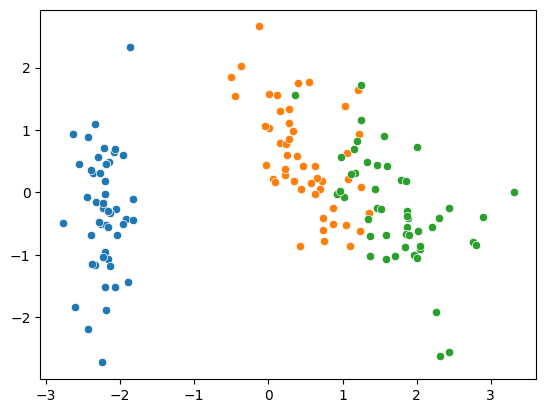

In [50]:
for l in y.unique():
  sns.scatterplot(x=X_pca[y==l, 0], y=X_pca[y==l, 1])